In [1]:
import os
sep_local = os.path.sep
sep_local

In [ ]:
%env TF_KERAS = 1

In [ ]:
import sys
sys.path.append('..' + sep_local + '..' + sep_local + '..') # For Windows import

In [ ]:
import os
os.chdir('..' + sep_local + '..' + sep_local + '..') # For Linux import


In [2]:
from training.generators.file_image_generator import create_image_lists, get_generators

Using TensorFlow backend.


In [3]:
#images_dir = 'D:\\datasets\\Ms_Pacman\\Ms_Pacman\\Test\\'
images_dir = '/home/azeghost/datasets/.mspacman/atari_v1/screens/mspacman' #Linux

In [4]:
#images_dir = '..\..\..\\data\\atari_v1\\screens\\mspacman'
validation_percentage = 25
valid_format = 'png'

In [5]:
imgs_list = create_image_lists(
    image_dir=images_dir, 
    validation_pct=validation_percentage, 
    valid_imgae_formats=valid_format
)

  DEBUG    | Looking for images in '0000'


  INFO     | 841 file found


  DEBUG    | Looking for images in '0001'


  INFO     | 1080 file found


  DEBUG    | Looking for images in '0002'


  INFO     | 624 file found


  DEBUG    | Looking for images in '0003'


  INFO     | 944 file found


  DEBUG    | Looking for images in '0004'


  INFO     | 1048 file found


  DEBUG    | Looking for images in '0005'


  INFO     | 938 file found


  DEBUG    | Looking for images in '0006'


  INFO     | 924 file found


  DEBUG    | Looking for images in '0007'


  INFO     | 651 file found


  DEBUG    | Looking for images in '0008'


  INFO     | 844 file found


  DEBUG    | Looking for images in '0009'


  INFO     | 698 file found


  DEBUG    | Looking for images in '0010'


  INFO     | 813 file found


  DEBUG    | Looking for images in '0011'


  INFO     | 938 file found


  DEBUG    | Looking for images in '0012'


  INFO     | 962 file found


  DEBUG    | Looking for images in '0013'


  INFO     | 950 file found


  DEBUG    | Looking for images in '0014'


  INFO     | 840 file found


  DEBUG    | Looking for images in '0015'


  INFO     | 858 file found


  DEBUG    | Looking for images in '0016'


  INFO     | 795 file found


  DEBUG    | Looking for images in '0017'


  INFO     | 915 file found


  DEBUG    | Looking for images in '0018'


  INFO     | 929 file found


  DEBUG    | Looking for images in '0019'


  INFO     | 1012 file found


  DEBUG    | Looking for images in '0020'


  INFO     | 995 file found


  DEBUG    | Looking for images in '0021'


  INFO     | 952 file found


  DEBUG    | Looking for images in '0022'


  INFO     | 1097 file found


  DEBUG    | Looking for images in '0023'


  INFO     | 1017 file found


  DEBUG    | Looking for images in '0024'


  INFO     | 787 file found


  DEBUG    | Looking for images in '0025'


  INFO     | 846 file found


  DEBUG    | Looking for images in '0026'


  INFO     | 669 file found


  DEBUG    | Looking for images in '0027'


  INFO     | 1085 file found


  DEBUG    | Looking for images in '0028'


  INFO     | 786 file found


  DEBUG    | Looking for images in '0029'


  INFO     | 841 file found


  DEBUG    | Looking for images in '0030'


  INFO     | 908 file found


  DEBUG    | Looking for images in '0031'


  INFO     | 1076 file found


  DEBUG    | Looking for images in '0032'


  INFO     | 1085 file found


  DEBUG    | Looking for images in '0033'


  INFO     | 849 file found


  DEBUG    | Looking for images in '0034'


  INFO     | 925 file found


  DEBUG    | Looking for images in '0035'


  INFO     | 1341 file found


  DEBUG    | Looking for images in '0036'


  INFO     | 1241 file found


  DEBUG    | Looking for images in '0037'


  INFO     | 1074 file found


  DEBUG    | Looking for images in '0038'


  INFO     | 858 file found


  DEBUG    | Looking for images in '0039'


  INFO     | 1032 file found


  DEBUG    | Looking for images in '0040'


  INFO     | 948 file found


  DEBUG    | Looking for images in '0041'


  INFO     | 977 file found


  DEBUG    | Looking for images in '0042'


  INFO     | 625 file found


  DEBUG    | Looking for images in '0043'


  INFO     | 768 file found


  DEBUG    | Looking for images in '0044'


  INFO     | 940 file found


  DEBUG    | Looking for images in '0045'


  INFO     | 890 file found


  DEBUG    | Looking for images in '0046'


  INFO     | 682 file found


  DEBUG    | Looking for images in '0047'


  INFO     | 976 file found


  DEBUG    | Looking for images in '0048'


  INFO     | 994 file found


  DEBUG    | Looking for images in '0049'


  INFO     | 863 file found


  DEBUG    | Looking for images in '0050'


  INFO     | 648 file found


## downscalse the image into fifth

In [6]:
scale=5
image_size=(160//scale, 210//scale, 3)
batch_size = 5
EPIS_LEN = 10
EPIS_SHIFT = 5

In [ ]:
#we created new  class_mode  episode_flat witch returns 
#da.from_array(np.reshape(batch_x, (-1,)+self.image_shape )), da.from_array(np.reshape(batch_gt, (-1,)+self.image_shape))

In [7]:
training_generator, testing_generator = get_generators(
    images_list=imgs_list, 
    image_dir=images_dir, 
    image_size=image_size, 
    batch_size=batch_size, 
    class_mode='episode_flat', 
    episode_len=EPIS_LEN, 
    episode_shift=EPIS_SHIFT
)

  INFO     | Found 33971 training files


  INFO     | Found 12408 validation files


In [8]:
import tensorflow as tf
import numpy as np

In [1]:
#changed output shapes of Dataset Generators 
#from (batch_size, EPIS_LEN, ) + image_size)
#to (batch_size* EPIS_LEN, ) + image_size) 

In [9]:
train_ds = tf.data.Dataset.from_generator(
    lambda: training_generator, 
    output_types=(tf.float32, tf.float32) ,
    output_shapes=(tf.TensorShape((batch_size* EPIS_LEN, ) + image_size), 
                   tf.TensorShape((batch_size* EPIS_LEN, ) + image_size)
                  )
)

test_ds = tf.data.Dataset.from_generator(
    lambda: testing_generator,     
    output_types=(tf.float32, tf.float32) ,
    output_shapes=(tf.TensorShape((batch_size* EPIS_LEN, ) + image_size), 
                   tf.TensorShape((batch_size* EPIS_LEN, ) + image_size)
                  )
)


In [10]:
dataset_name = 'atari_v1_Pacman'

In [12]:
intermediate_dim = 10
inputs_shape= image_size # image shape
latents_dim = 10

In [13]:
inputs_shape

(32, 42, 3)

In [14]:

enc_lays2 = [
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    # No activation
    tf.keras.layers.Dense(latents_dim)
]

dec_lays2 = [
    tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
    tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
    tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation='relu'),
    
    # No activation
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(1, 1), padding="SAME"),

]

In [15]:
#Not used here Dense
enc_mean_lays = [tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu')]

enc_var_lays = [tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=intermediate_dim, activation='relu')]

dec_lays = [tf.keras.layers.Dense(units=2*intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=2*intermediate_dim, activation='relu'),
            tf.keras.layers.Dense(units=2*intermediate_dim, activation='relu')]

In [16]:
model_name = 'Atari_AE_Dense'

In [17]:
import os
#experiments_dir='..'+sep_local+'..'+sep_local+'..'+sep_local+'experiments'+sep_local + model_name
experiments_dir=os.getcwd()+ sep_local  +'experiments'+sep_local + model_name

In [18]:
from os.path import abspath
absolute = abspath(experiments_dir)
print("Recording_dir",absolute)
print("Current working dir",os.getcwd())


'..\\experiments\\Atari_AE\\Atari_AE'

In [19]:
from training.autoencoding_basic.autoencoders.autoencoder import autoencoder as AE

In [20]:
variables_params = \
[
    {
        'name': 'inference', 
        'inputs_shape':inputs_shape,
        'outputs_shape':latents_dim,
        'layers': enc_lays2
    }
    ,
    
        {
        'name': 'generative', 
        'inputs_shape':latents_dim,
        'outputs_shape':inputs_shape,
        'layers':dec_lays2
    }
]

In [21]:
from utils.data_and_files.file_utils import create_if_not_exist
_restore = os.path.join(experiments_dir, 'var_save_dir')
create_if_not_exist(_restore)
absolute = abspath(_restore)
print("Restore_dir",absolute)

In [22]:
ae = AE( 
    name=model_name,
    latents_dim=latents_dim,
    batch_size=batch_size,
    variables_params=variables_params, 
    filepath=None #to restore trained model, set filepath=_restore
    )

'..\\experiments\\Atari_AE\\var_save_dir'

In [23]:
ae.compile(metrics=None)

(32, 42, 3)

In [24]:
train_ds

inference
Model: "inference"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 20, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 9, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 4032)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                40330     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)        

  WARNING  | None


generative
Model: "generative"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1568)              17248     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4032)    

  WARNING  | None


In [25]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

from training.callbacks.sample_generation import SampleGeneration
from training.callbacks.save_model import ModelSaver


TensorShape([36, 10])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



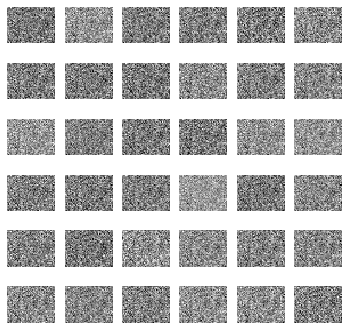

  ERROR    | No former training found ... 
Epochs Progress:   0%|                                                                          | 0/10 [00:00<?, ?it/s]

  INFO     | Training ... 
Epochs Progress, Training Iterations 309:   0%|                                                 | 0/10 [03:27<?, ?it/s]

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    min_delta=1e-12, 
    patience=5, 
    verbose=1, 
    restore_best_weights=True
)

In [ ]:
ms = ModelSaver(filepath=_restore,save_freq=5)

In [ ]:
csv_dir = os.path.join(experiments_dir, 'csv_dir')
create_if_not_exist(csv_dir)
csv_dir = os.path.join(csv_dir, model_name+'.csv')
csv_log = tf.keras.callbacks.CSVLogger(csv_dir, append=True)
absolute = abspath(csv_dir)
print("Csv_dir",absolute)

In [ ]:
image_gen_dir = os.path.join(experiments_dir, 'image_gen_dir')
create_if_not_exist(image_gen_dir)
absolute = abspath(image_gen_dir)
print("Image_gen_dir",absolute)

In [ ]:
sg = SampleGeneration(latents_shape=latents_dim, filepath=image_gen_dir, gen_freq=5, save_img=True, gray_plot=True)

In [ ]:
ae.fit(
    x=train_ds,
    steps_per_epoch=1000,
    epochs=100, 
    verbose=1,
    callbacks=[ es, ms, csv_log, sg],
    workers=-1,
    use_multiprocessing=True
)